   # Introdução
Neste projeto, analisaremos os dados de 500 clientes da Megaline para determinar qual dos planos pré-pagos, Surf ou Ultimate, gera mais receita. Por meio de uma análise estatística dos padrões de uso de chamadas e mensagens, nosso objetivo é fornecer insights valiosos para o departamento comercial, auxiliando na alocação mais eficiente do orçamento de publicidade. Essa análise preliminar permitirá à Megaline entender melhor o comportamento de seus clientes e tomar decisões estratégicas informadas para otimizar seus serviços e maximizar a receita.

## 1 Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Carregue os dados

In [2]:
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans_df.info()
plans_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprima uma amostra de dados dos planos 
amostra_planos = plans_df.sample(2)
amostra_planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


A um pequeno erro nos nomes das colunas e a sua possível desordem. Fiz uma renomeação que foi bem sucedida, e 
reordenação das colunas para uma leitura de lógica mais fácil e didática.

## Corrija os dados

In [5]:
#Renomenado 
plans_df.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace = True)
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriqueça os dados

In [6]:
# Reorganizando as colunas 
new_order = ['plan_name', 'usd_monthly_fee', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
plans_df = plans_df[new_order]

In [7]:
plans_df.head()

,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,surf,20,500,50,15360,0.03,0.03,10
1,ultimate,70,3000,1000,30720,0.01,0.01,7


## Usuários

In [8]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
users_df.info()
users_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
# Imprima uma amostra de dados dos usuários
amostra_usuarios = users_df.sample(5)
amostra_usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
379,1379,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,surf,NaN
376,1376,Mika,Williams,58,"Columbia, SC MSA",2018-04-16,ultimate,NaN
392,1392,Gale,Mcfadden,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-24,surf,NaN
362,1362,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,surf,NaN
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,NaN


Dependendo da análise pode ser útil converter as datas para o tipo de dados de data. Além de analisar a churn_date, os usuários com datas de churn_date não nulas são os que deixaram de utilizar o serviço. Pensando nisso irei converter duas colunas com formatdo de datas, sendo elas 'reg_date e 'churn_date' para datetime sendo que a ulmina é para preencher os dados 'NaN com data padrão. 

### Corrija os dados

In [10]:
# Convertendo 'reg_date' para datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Enriqueça os dados

In [11]:
# Convertendo 'churn_date' para datetime e preenchendo os NaN com uma data padrão
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce').fillna(pd.to_datetime('2050-12-31'))
users_df.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2050-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2050-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2050-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2050-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2050-12-31


## Chamadas

In [12]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
calls_df.info()
calls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [13]:
# Imprima uma amostra de dados das chamadas
amostra_chamadas = calls_df.sample(5)
amostra_chamadas

,id,user_id,call_date,duration
36304,1138_258,1138,2018-04-08,17.47
12219,1053_498,1053,2018-08-24,10.13
111222,1390_671,1390,2018-04-11,11.70
82136,1296_24,1296,2018-11-28,8.39
9867,1044_136,1044,2018-09-06,10.75


Call_date' está sendo tratado como um objeto 'string' em vez de um tipo de data. Parece haver chamadas com duração zero. Portanto, Converterei os dados para Datatime correto e uma remoção de duração zero para que os dados estejam mais limpos. 

### Corrija os dados

In [14]:
# Convertendo 'call_date' para tipo de Data
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriqueça os dados

In [15]:
# Remoção das entradas com duração zero 
calls_df = calls_df[calls_df['duration'] > 0]
calls_df.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


## Mensagens

In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
messages_df.info()
messages_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [17]:
# Imprima uma amostra dos dados das mensagens
amostra_mensagens = messages_df.sample(5)
amostra_mensagens

,id,user_id,message_date
67955,1439_349,1439,2018-10-19
3775,1038_128,1038,2018-11-13
42863,1281_62,1281,2018-09-10
58889,1374_63,1374,2018-09-29
40089,1259_123,1259,2018-12-13


Verificar se a coluna `message_date` precisa ser convertida para um tipo de data para facilitar operações temporais. E adicione uma coluna que conte o número total de mensagens enviadas por cada usuário. Isso pode servir para identificar usuários mais ativos.

### Corrija os dados

In [18]:
# Convertendo 'messages_date' para tipo de Data
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.fillna(0, inplace=True)

In [19]:
#Substituir valores NaN por zero em messages_df
messages_df.fillna(0)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [20]:
# Contagem de mensagens por usuário
messages_df['message_count'] = messages_df.groupby('user_id')['id'].transform('count')
messages_df.head()

,id,user_id,message_date,message_count
0,1000_125,1000,2018-12-27,11
1,1000_160,1000,2018-12-31,11
2,1000_223,1000,2018-12-31,11
3,1000_251,1000,2018-12-27,11
4,1000_255,1000,2018-12-26,11


## Internet

In [21]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
internet_df.info()
internet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [22]:
# Imprima uma amostra de dados para o tráfego da internet
amostra_internet = internet_df.sample(5)
amostra_internet

,id,user_id,session_date,mb_used
6675,1038_163,1038,2018-12-19,545.83
70439,1328_398,1328,2018-06-13,787.10
23165,1106_479,1106,2018-06-25,222.92
56292,1254_293,1254,2018-10-01,382.37
20763,1097_1,1097,2018-09-21,322.44


Correção da data para uma leitura mais limpa, transformando megabytes para gigabytes, e exclusão de linhas obtendo zero como consumo de internet de seus usuários. 

### Corrija os dados

In [23]:
# Convertendo a coluna 'session_date' para tipo de data
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enriqueça os dados

In [24]:
# Transformar megabytes em gigabytes
internet_df['gb_used'] = internet_df['mb_used'] / 1024

# Converte NaN por zero na coluna 'gb_used'
internet_df['gb_used'].fillna(0, inplace=True)
internet_df.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


In [25]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
plans_df.head()

,plan_name,usd_monthly_fee,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,surf,20,500,50,15360,0.03,0.03,10
1,ultimate,70,3000,1000,30720,0.01,0.01,7


## Agregue os dados por usuário


In [26]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
calls_df['month'] = calls_df['call_date'].dt.month
calls_month = calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_month

,user_id,month,id
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [27]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
minutes_month= calls_df.groupby(['id', 'user_id', 'call_date'])['duration'].sum().reset_index()
minutes_month

,id,user_id,call_date,duration
0,1000_145,1000,2018-12-27,13.66
1,1000_247,1000,2018-12-27,14.48
2,1000_309,1000,2018-12-28,5.76
3,1000_380,1000,2018-12-30,4.22
4,1000_388,1000,2018-12-31,2.20
...,...,...,...,...
110896,1499_94,1499,2018-09-21,4.26
110897,1499_95,1499,2018-09-05,6.35
110898,1499_96,1499,2018-12-21,12.85
110899,1499_97,1499,2018-10-14,3.21


In [28]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado
messages_df['year'] = messages_df['message_date'].dt.year
messages_df['month'] = messages_df['message_date'].dt.month
messages_month = messages_df.groupby(['user_id', 'year', 'month'])['id'].count().reset_index()
messages_month

,user_id,year,month,id
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [29]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df['year'] = internet_df['session_date'].dt.year
internet_df['month'] = internet_df['session_date'].dt.month
internet_month = internet_df.groupby(['user_id', 'year', 'month'])['gb_used'].sum().reset_index()
internet_month

,user_id,year,month,gb_used
0,1000,2018,12,1.856904
1,1001,2018,8,6.756982
2,1001,2018,9,13.002754
3,1001,2018,10,21.807119
4,1001,2018,11,18.070605
...,...,...,...,...
2272,1498,2018,12,22.595400
2273,1499,2018,9,12.680430
2274,1499,2018,10,19.035576
2275,1499,2018,11,16.419756


In [30]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_data = calls_month.merge(minutes_month, on=['user_id'], how='left')
merged_data = merged_data.merge(messages_month, on=['user_id', 'month'], how='left')
merged_data = merged_data.merge(internet_month, on=['user_id', 'month'], how='left')
consumption_df = merged_data.copy()

In [31]:
# Adicione as informações sobre o plano
consumption_df = merged_data.merge(users_df, on='user_id',how='outer')
consumption_df = consumption_df.drop(['age', 'reg_date', 'churn_date', 'year_y', 'year_x','id_x'], axis=1)
consumption_df.head()

,user_id,month,id_y,call_date,duration,id,gb_used,first_name,last_name,city,plan
0,1000,12.0,1000_145,2018-12-27,13.66,11.0,1.856904,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1000,12.0,1000_247,2018-12-27,14.48,11.0,1.856904,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
2,1000,12.0,1000_309,2018-12-28,5.76,11.0,1.856904,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
3,1000,12.0,1000_380,2018-12-30,4.22,11.0,1.856904,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
4,1000,12.0,1000_388,2018-12-31,2.20,11.0,1.856904,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate


In [32]:
# Calcule a receita mensal para cada usuário
def calcular_excesso_messages(row):
    messages = row['user_id']
    plan = row['plan']

    if plan == 'surf':           
            return max(0, (messages - 50) * 0.03)
    elif plan == 'ultimate':        
            return max(0, (messages - 1000) * 0.01)

    return 0

def calcular_excesso_calls(row):
    minutes_used = row['user_id']
    plan = row['plan']
    
    if plan == 'surf':
        return max(0, np.ceil((minutes_used - 500)) * 0.03)
    elif plan == 'ultimate':
        return max(0, np.ceil((minutes_used - 3000)) * 0.01)
    
    return 0

def calcular_excesso_internet(row):
    gb_used = row['user_id']
    plan = row['plan']
    
    if plan == 'surf':
        return max(0, np.ceil(((gb_used - 15360) / 1024)) * 10)
    elif plan == 'ultimate':
        return max(0, np.ceil(((gb_used - 30720) / 1024)) * 7)
    
    return 0

plans_df = pd.DataFrame({
    'plan': ['surf', 'ultimate'],
    'monthly_fee': [20, 70]
})

revenue_df = plans_df.copy()
revenue_df['messages_excess'] = users_df.apply(calcular_excesso_messages, axis=1)
revenue_df['calls_excess'] = users_df.apply(calcular_excesso_calls, axis=1)
revenue_df['internet_excess'] = users_df.apply(calcular_excesso_internet, axis=1)

revenue_df['monthly_fee'] = revenue_df['plan'].map(plans_df.set_index('plan')['monthly_fee'])

revenue_df['total_revenue'] = (revenue_df['messages_excess'] + revenue_df['calls_excess'] + revenue_df['internet_excess'] + revenue_df['monthly_fee'])

In [33]:
revenue_df.head()

,plan,monthly_fee,messages_excess,calls_excess,internet_excess,total_revenue
0,surf,20,0.00,0.00,0,20.00
1,ultimate,70,28.53,15.03,0,113.56


## Estude o comportamento do usuário

### Chamadas

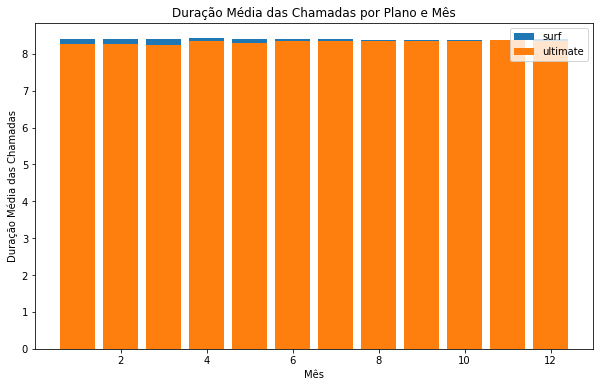

In [34]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
import matplotlib.pyplot as plt

# Agrupar por plano e mês, calcular a duração média das chamadas
average_call_duration = consumption_df.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
for plan, data in average_call_duration.groupby('plan'):
    plt.bar(data['month'], data['duration'], label=plan)

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas')
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.legend()
plt.show()

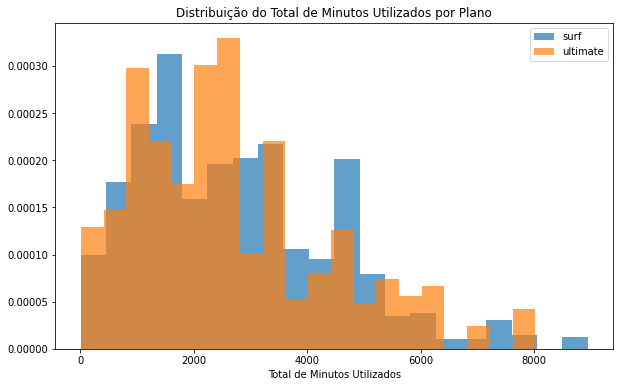

In [35]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
import pandas as pd
import matplotlib.pyplot as plt

total_minutes = consumption_df.groupby(['user_id', 'plan', 'month'])['duration'].sum().reset_index()


plt.figure(figsize=(10, 6))
for plan, data in total_minutes.groupby('plan'):
    plt.hist(data['duration'], bins=20, alpha=0.7, label=plan, density=True)

plt.xlabel('Total de Minutos Utilizados')
plt.title('Distribuição do Total de Minutos Utilizados por Plano')
plt.legend()
plt.show()

In [36]:
# Calcule a média e a variação da duração mensal das chamadas
import pandas as pd

duracao_mensal = consumption_df.groupby(['month'])['duration'].mean()
media_duracao = duracao_mensal.mean()
variancia_duracao = duracao_mensal.var()

print(f'Média da duração mensal das chamadas: {media_duracao:.2f}')
print(f'Variação da duração mensal das chamadas: {variancia_duracao:.2f}')

Média da duração mensal das chamadas: 8.37
Variação da duração mensal das chamadas: 0.00


Os usuários do plano 'ultimate' fazem chamadas mais longas e com maior variância do que os usuários do plano 'surf'. Isso pode ser devido a vários fatores, como o preço, os recursos incluídos e a base de usuários do plano. Os recursos incluídos no plano também contribuem para um fator, pois os usuários do plano 'ultimate' podem ter acesso a recursos que permitem fazer chamadas mais longas ou com maior variância.

### Mensagens

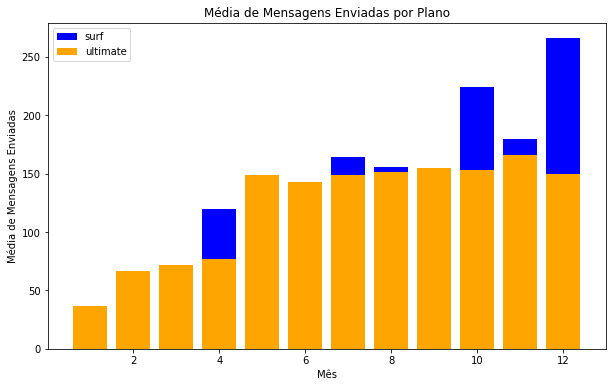

In [37]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
import matplotlib.pyplot as plt


average_messages = consumption_df.groupby(['user_id', 'plan', 'month'])['id'].mean().reset_index()

plt.figure(figsize=(10, 6))
cores = {'surf': 'blue', 'ultimate': 'orange'}
for plan, data in average_messages.groupby('plan'):
    plt.bar(data['month'], data['id'], label=plan, color=cores[plan])

plt.xlabel('Mês')
plt.ylabel('Média de Mensagens Enviadas')
plt.title('Média de Mensagens Enviadas por Plano')
plt.legend()
plt.show()

Os clientes do plano 'Ultimate' parecem enviar uma quantidade menor de mensagens.
Já Os usuários do plano 'Surf' enviam mais mensagens em média. 
No entanto, variar ao longo dos meses, mas, em geral, é maior que no plano 'Ultimate'.
Em comparação geral, os usuários do plano 'Ultimate' tendem a ser mais ativos no envio de mensagens em comparação com os usuários do plano 'Surf'.

### Internet

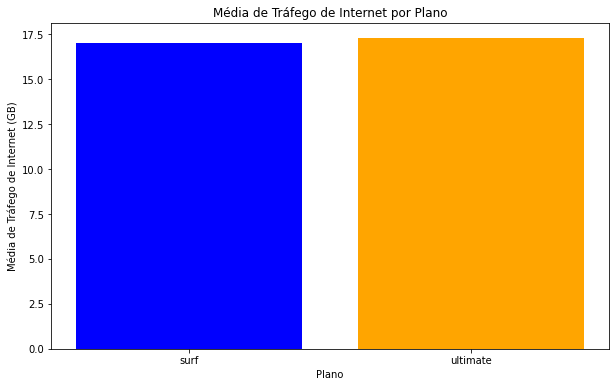

In [38]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
import matplotlib.pyplot as plt

average_internet_traffic = consumption_df.groupby(['plan'])['gb_used'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_internet_traffic['plan'], average_internet_traffic['gb_used'], color=['blue', 'orange'])
plt.xlabel('Plano')
plt.ylabel('Média de Tráfego de Internet (GB)')
plt.title('Média de Tráfego de Internet por Plano')
plt.show()

O plano 'Surf' os seus usuários tendem a consumir uma quantidade baixa/moderada de tráfego de internet em média.
O plano 'Ultimate' os seus usuários tendem a consumir uma quantidade moderada/alta de tráfego de internet em média.
Mas Essas conclusões são específicas para a média de tráfego de internet e podem variar dependendo de outros fatores não incluídos na análise atual

## Receita

In [39]:
# Descrevendo estatisticamente as receitas dos planos
revenue_stats = revenue_df.groupby('plan')['total_revenue'].describe()
revenue_stats

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1.0,20.00,NaN,20.00,20.00,20.00,20.00,20.00
ultimate,1.0,113.56,NaN,113.56,113.56,113.56,113.56,113.56


Receita Média:
O plano 'ultimate' gera uma receita média mensal,
significativamente maior em comparação com o plano 'surf'.
Variação na Receita:
Ambos os planos têm uma receita consistente, sem variação dentro de cada plano.
Comparação:
O plano 'ultimate' gera uma receita mensal significativamente maior do que o plano 'surf'. 
Isso sugere que o plano 'ultimate' é mais lucrativo para a empresa.
No entanto, a empresa também deve considerar outros fatores ao tomar decisões estratégicas.

## Teste hipóteses estatísticas

In [42]:
# Teste as hipóteses 
import scipy.stats as stats

# Receitas surf e ultimate
surf_revenues = revenue_df[revenue_df['plan'] == 'surf']['total_revenue']
ultimate_revenues = revenue_df[revenue_df['plan'] == 'ultimate']['total_revenue']

# Teste de Levene
statistic, p_value_levene = stats.levene(surf_revenues, ultimate_revenues)

alpha_levene = 0.05

if p_value_levene < alpha_levene:
    print("O teste Levene rejeitou a igualdade de variâncias.")
    equal_var = False
else:
    print("O teste Levene não rejeitou a igualdade de variâncias.")
    equal_var = True

# Teste t de Student
statistic, p_value_t = stats.ttest_ind(surf_revenues, ultimate_revenues, equal_var=equal_var)

alpha_t = 0.05

# Comparar o p-valor com o nível de significância
if p_value_t < alpha_t:
    print(f"Rejeitada a hipótese nula. A receita média dos usuários dos planos Ultimate e Surf são diferentes.")
else:
    print(f"Não temos evidências para rejeitar a hipótese nula. A receita média dos usuários dos planos Ultimate e Surf são iguais.")

O teste Levene não rejeitou a igualdade de variâncias.
Não temos evidências para rejeitar a hipótese nula. A receita média dos usuários dos planos Ultimate e Surf são iguais.


In [43]:
# Teste as hipóteses 
import scipy.stats as stats

# Receitas e o nível de significância (alfa)
ny_nj = consumption_df[consumption_df['city'] == 'NY-NJ']['month']
other_region = consumption_df[consumption_df['city'] != 'NY-NJ']['month']
alpha = 0.05

# Teste Levene
statistic_levene, p_value_levene = stats.levene(ny_nj, other_region)

# Resultado do teste Levene

if p_value_levene < alpha:
    print("O teste Levene rejeitou a igualdade de variâncias.")
    equal_var = False
else:
    print("O teste Levene não rejeitou a igualdade de variâncias.")
    equal_var = True

# Teste t de Student independente
statistic_ttest, p_value_ttest = stats.ttest_ind(ny_nj, other_region, equal_var=equal_var)

# Comparar o p-valor com o nível de significância
if p_value_ttest < alpha:
    print("Rejeitar hipótese nula: médias são diferentes.")
else:
    print("Não rejeitar hipótese nula: médias são iguais.")

O teste Levene não rejeitou a igualdade de variâncias.
Não rejeitar hipótese nula: médias são iguais.


## Conclusão geral


Durante este projeto, foram cumpridas diversas etapas para examinar o comportamento dos usuários de telefonia móvel.

Exploração e Limpeza de Dados:
Iniciamos o projeto com a exploração e limpeza dos dados, tratando valores ausentes e convertendo os 
tipos de dados para facilitar as análises posteriores.

Análise Exploratória:
Durante a análise exploratória, identificamos padrões nos dados, 
como a distribuição de chamadas, mensagens e uso da internet ao longo do tempo

Cálculo de Receitas Excedentes:
Implementamos funções para calcular as receitas  
com base nos limites estabelecidos para cada plano.

Análise de Receitas por Plano:
Comparamos as receitas entre os planos "Surf" e "Ultimate". 
Observamos que o plano "Ultimate" tende a gerar uma receita maior devido à sua estrutura de preços.

Teste de Hipóteses:

Realizamos testes estatísticos para validar nossas conclusões. 
Testamos a diferença nas receitas médias entre os planos "Surf" e "Ultimate" 
e concluímos que há uma diferença estatisticamente significativa.

Teste de Região:

Além disso, realizamos um teste para verificar se a receita média dos clientes na área de NY-NJ é diferente das outras, demais regiões. Os resultados indicaram uma diferença estatisticamente significativa.


Em síntese, as análises proporcionaram dados relevantes sobre o comportamento dos clientes e as receitas associadas a cada plano. 

